# CIS 4321 Project Template
# Dr. Mohammad Salehan

This notebook explains the steps needed to be taken to complete this project. Please carefully answer to all questions raised in this template. The notebook you submit should be self-explanatory which means that you  need to clearly explain what each peice of code is suposed to do. All the cells containing code must include comments that explain what the code is supposed to do.<br>
To create a cell that contains comments, click on the cell, then from Cell menu select CellType -> MarkDown.

## 1. Problem definition
Start with explaining the problem and how you plan the address it using machine learning.

The problem that we have identified is related to customer churn in a telecom company. Customer churn is a significant problem for telecom companies as it leads to a loss of revenue and a decrease in market share. Identifying the factors that contribute to customer churn can help telecom companies take proactive measures to retain their customers and improve their
overall customer satisfaction. 


## 2. Data description
Explain the source of data, what each record represents, number of records, and detailed descriptions of all variables including at least a one-sentence description and data type. Specify which variables will be used in analysis.

The source of the data is from a fictional telecommunication company and it represents a sample of their customer base. The dataset consists of 7,043 records and 12 variables. Each record represents a unique customer and their corresponding information. 
Gender: The gender of the customer
SeniorCitizen: Whether the customer is a senior citizen or not
Partner: Whether the customer has a partner or not
Dependents: Whether the customer has dependents or not
Tenure: The number of months the customer has been with the company
InternetService: The type of internet service the customer has
Contract: The type of contract the customer has
PaperlessBilling: Whether the customer has paperless billing or not
PaymentMethod: The payment method of the customer
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
Churn: Whether the customer has churned or not


## 3. Method of analysis
Explain the selected method (classification, regression, or clustering).
<ul><li>Classification: identify the label (i.e., dependent variable) and all predictors.
<li>Regression: identify the label (i.e., dependent variable) and all predictors.
<li>Clustering: explain what kind of clusters you expect to find and how those clusters would help you solve the stated problem.

For the Telco Customer Churn dataset, the selected method would be classification. The goal is to predict whether a customer is likely to churn or not, which is a binary outcome (Yes or No). The dependent variable or label would be Churn, while the predictors or independent variables would include other variables such as tenure, InternetService, MonthlyCharges, TotalCharges, Contract, PaperlessBilling, and PaymentMethod. These variables will be used to train a classification model that can accurately predict whether a customer is likely to churn or not based on their individual characteristics and behavior.

Regression would not be an appropriate method for this dataset since the dependent variable is categorical (binary) and not continuous. Clustering would also not be an appropriate method as there is a clear dependent variable (churn) that we are trying to predict, and the goal is not to group customers into similar clusters but rather to identify the predictors that are most important in predicting customer churn.

## 4. Loading data
Load your dataset using a relative path. 

In [311]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
!pip install pydotplus

In [278]:
df=pd.read_csv("churn.csv")

In [279]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We used this code to make sure all columns are in.

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [281]:
df.shape

(7043, 21)

In [282]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [283]:
le = LabelEncoder()
df['customerID'] = le.fit_transform(df['customerID'])
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])
df['Churn'] = le.fit_transform(df['Churn'])

In [284]:
df=df.apply(lambda x: x.astype('float64'))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


## 5. Descriptive statistics
Run descriptive statistics. Explain how the output will guide your analysis.

In [286]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [287]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


In [288]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
corr

,Correlations
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
TotalCharges,0.014479
PhoneService,0.011942
gender,-0.008612
customerID,-0.017447


<AxesSubplot:>

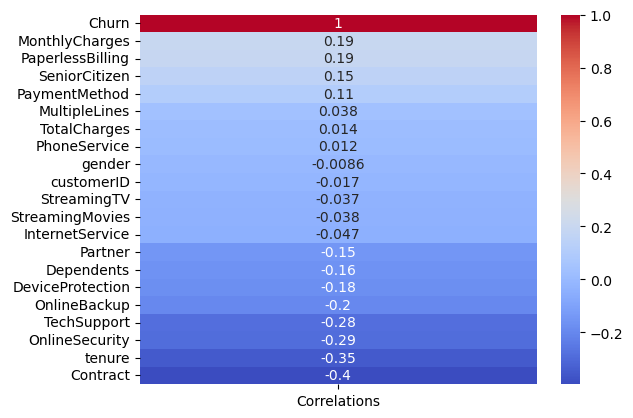

In [289]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

## 6. Missing values and outliers
Explain the steps that you plan to take to handle missing values and any potential outliers. Run code that handles missing values and outliers.

In [290]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [291]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0.0,1.0,1.0,24.0,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0.0,1.0,1.0,72.0,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0.0,1.0,1.0,11.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


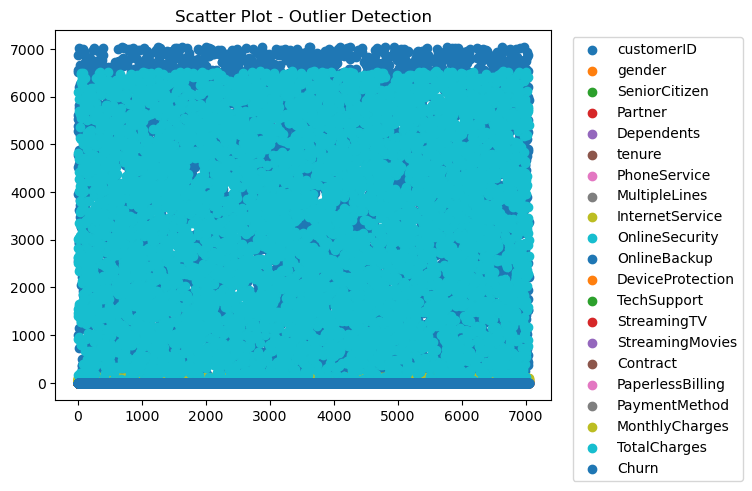

In [292]:
for column in df.columns:
    plt.scatter(df.index, df[column], label=column)
plt.title('Scatter Plot - Outlier Detection')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

No outliers shown in this scatterplot.

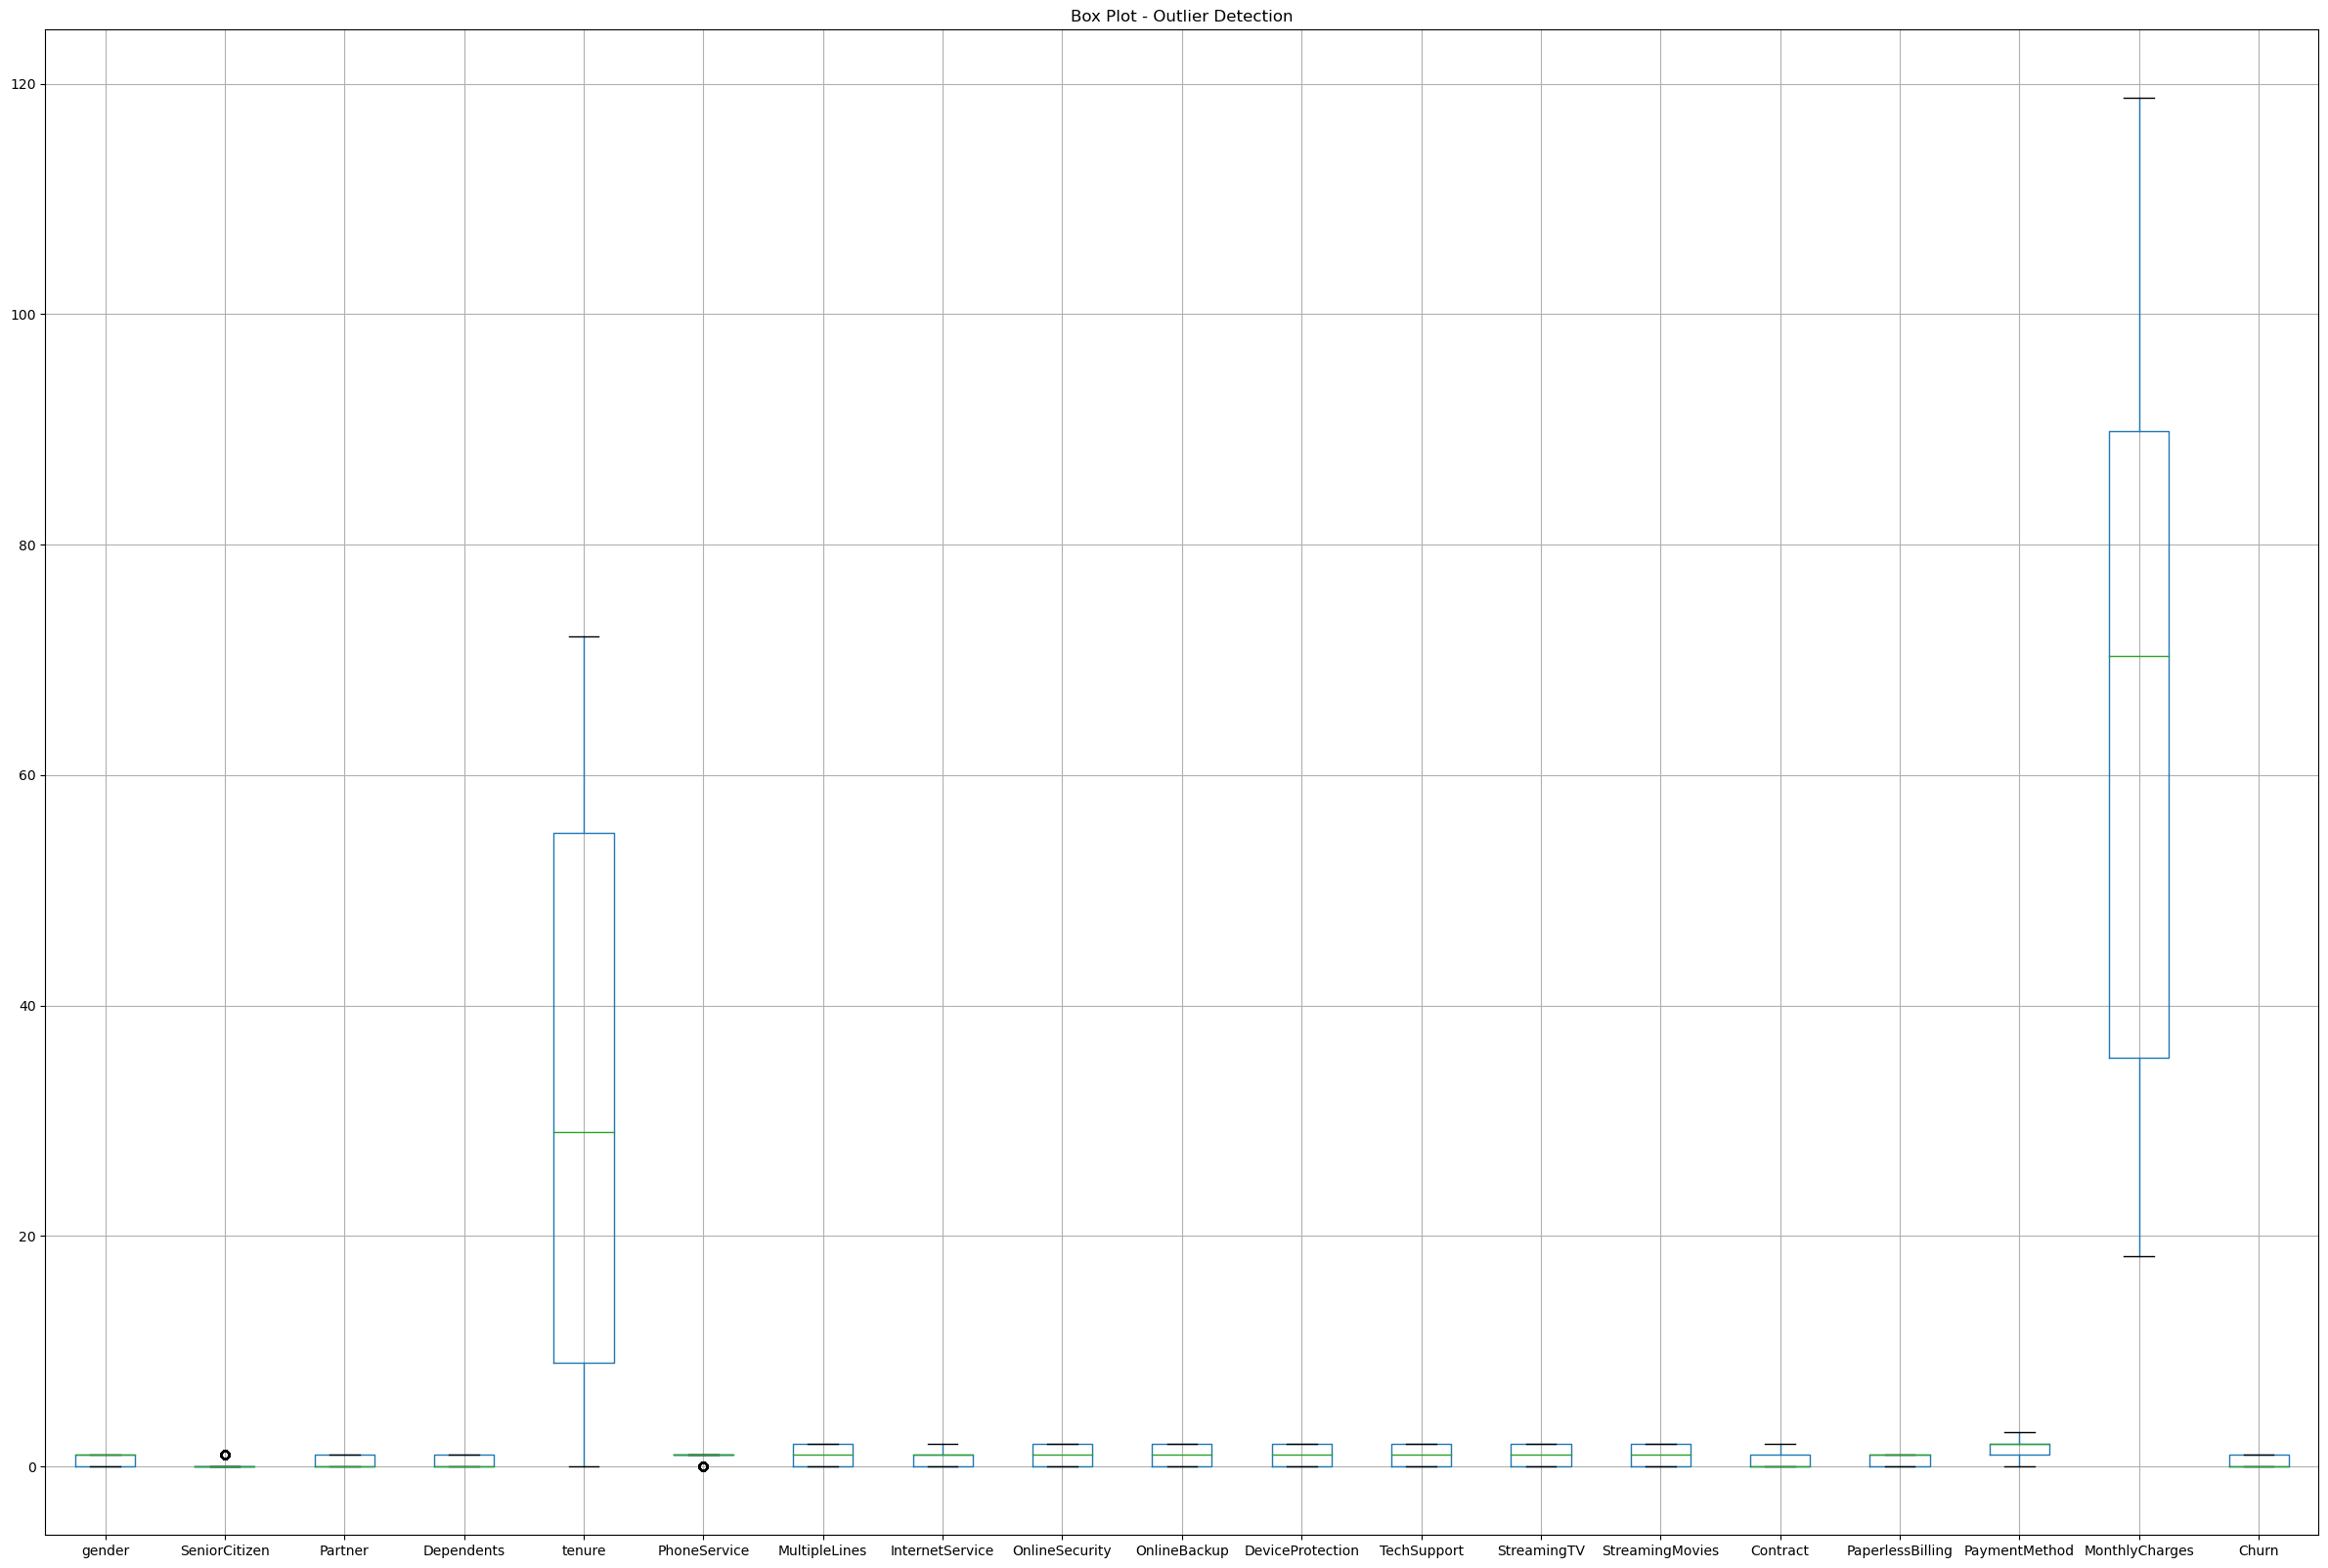

In [293]:
columns_to_drop = ['customerID', 'TotalCharges']
data_filtered = df.drop(columns_to_drop, axis=1)
plt.figure(figsize=(30, 20))
data_filtered.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.show()

(temporarily dropped cutomerID and TotalCharges due to the big gap in number size and created seperate box plot for them below)

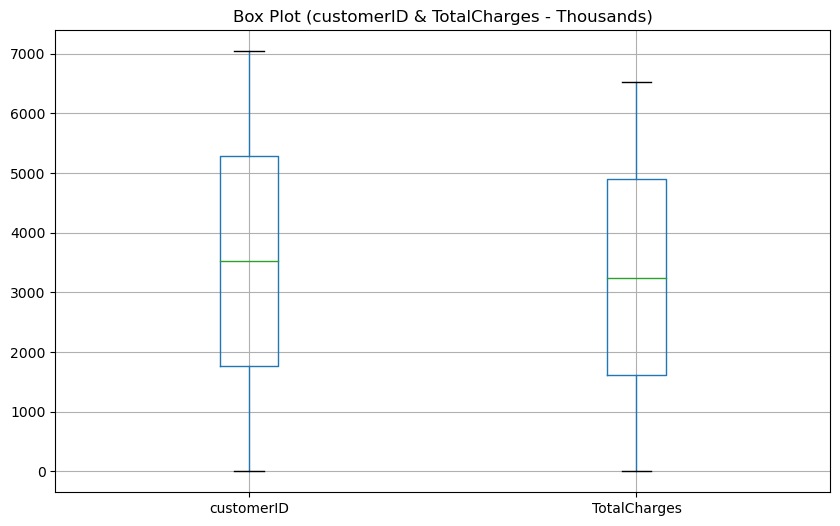

In [294]:
plt.figure(figsize=(10, 6))
df[['customerID', 'TotalCharges']].boxplot()
plt.title('Box Plot (customerID & TotalCharges - Thousands)')
plt.show()

There are no missing values and no outliers.

## 7. Data visualization
Please see the project description for requirements.

In [295]:
df = df.drop(columns=['customerID', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0.0,0.0,0.0,34.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,70.70,925.0,1.0


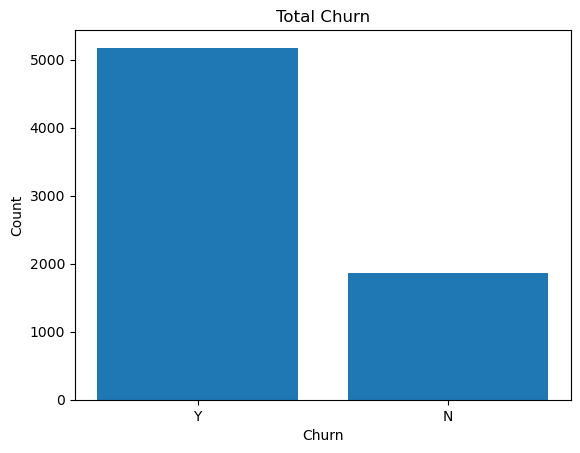

In [244]:
df['Churn'].value_counts()
categories = counts.index.tolist()
values = counts.tolist()
plt.bar(categories, values)
plt.xticks(categories, ['Y', 'N'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Total Churn')
plt.show()

Here is the total churn count of those who churned those who did not.

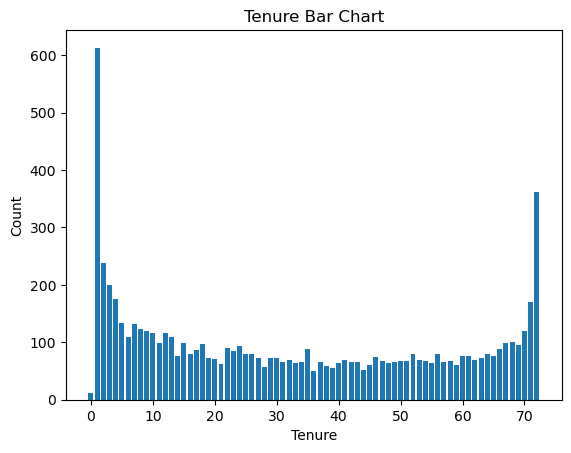

In [296]:
df['tenure']
tenure_counts = tenure.value_counts()
sorted_tenure = tenure_counts.sort_index()
plt.bar(sorted_tenure.index, sorted_tenure.values)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure Bar Chart')
plt.show()

Here is the barchart of the amount of months that customers stayed with the company.
X axis is the amount of months stayed, Y axis is amount of customers that stayed for said months.

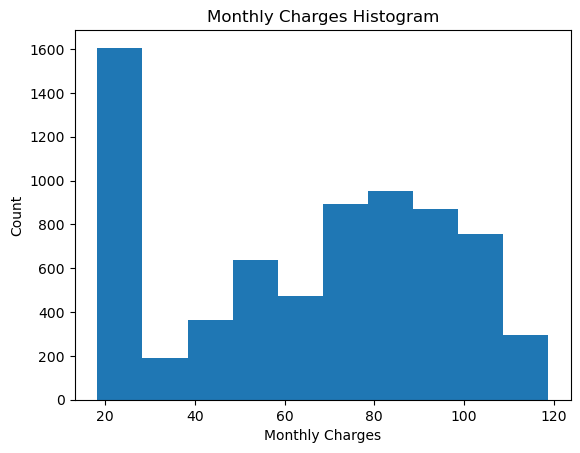

In [297]:
monthly_charges=df['MonthlyCharges']
plt.hist(monthly_charges, bins=10)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charges Histogram')
plt.show()

Here is the barchart of how much customers pay per count of customers.

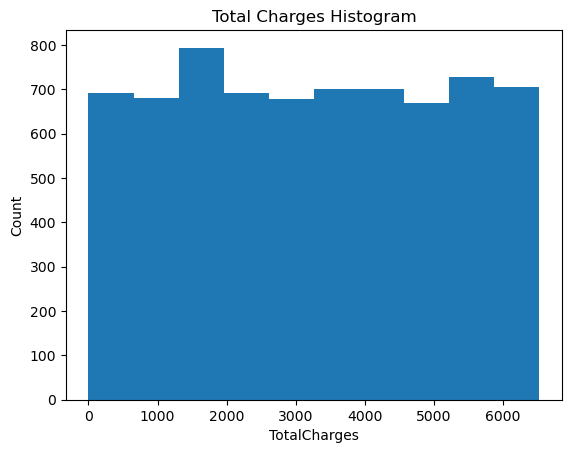

In [298]:
total_charges=df['TotalCharges']
plt.hist(total_charges, bins=10)
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.title('Total Charges Histogram')
plt.show()

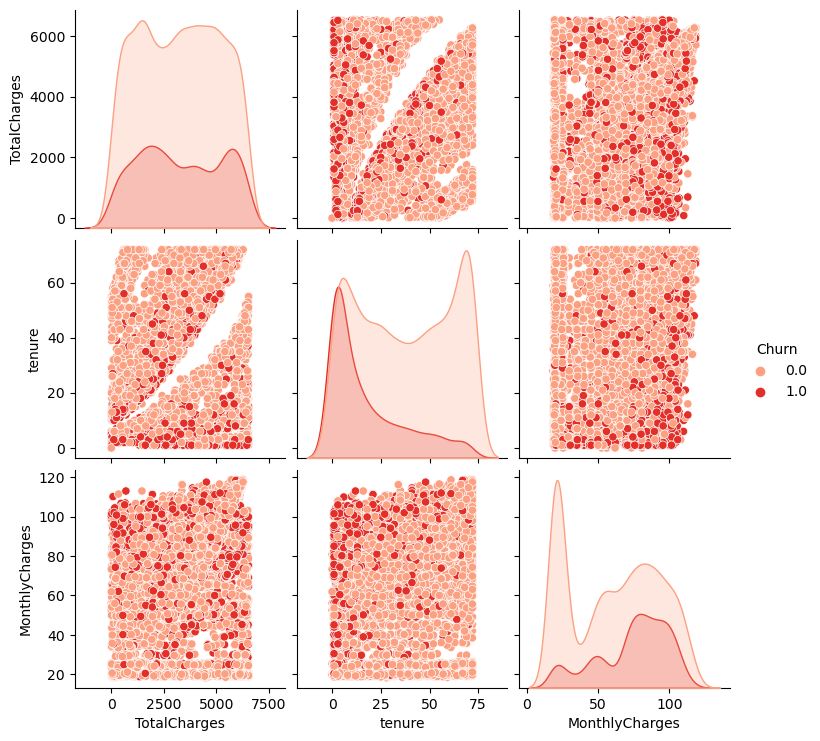

In [299]:
sns.pairplot(data = df[["TotalCharges","tenure","MonthlyCharges","Churn"]],
            hue="Churn", palette='Reds')
plt.show()

Here is a pairplot showing MonthlyCharges, tenure, and TotalCharges to the amount of customers churn.

## 8. Correlation analysis
Generate a correlation matrix and interpret it. Is multicollinearity an issue?

**PLEASE SKIP TO DUMMIES AND THEN START BACK HERE**

<Figure size 1200x1000 with 0 Axes>

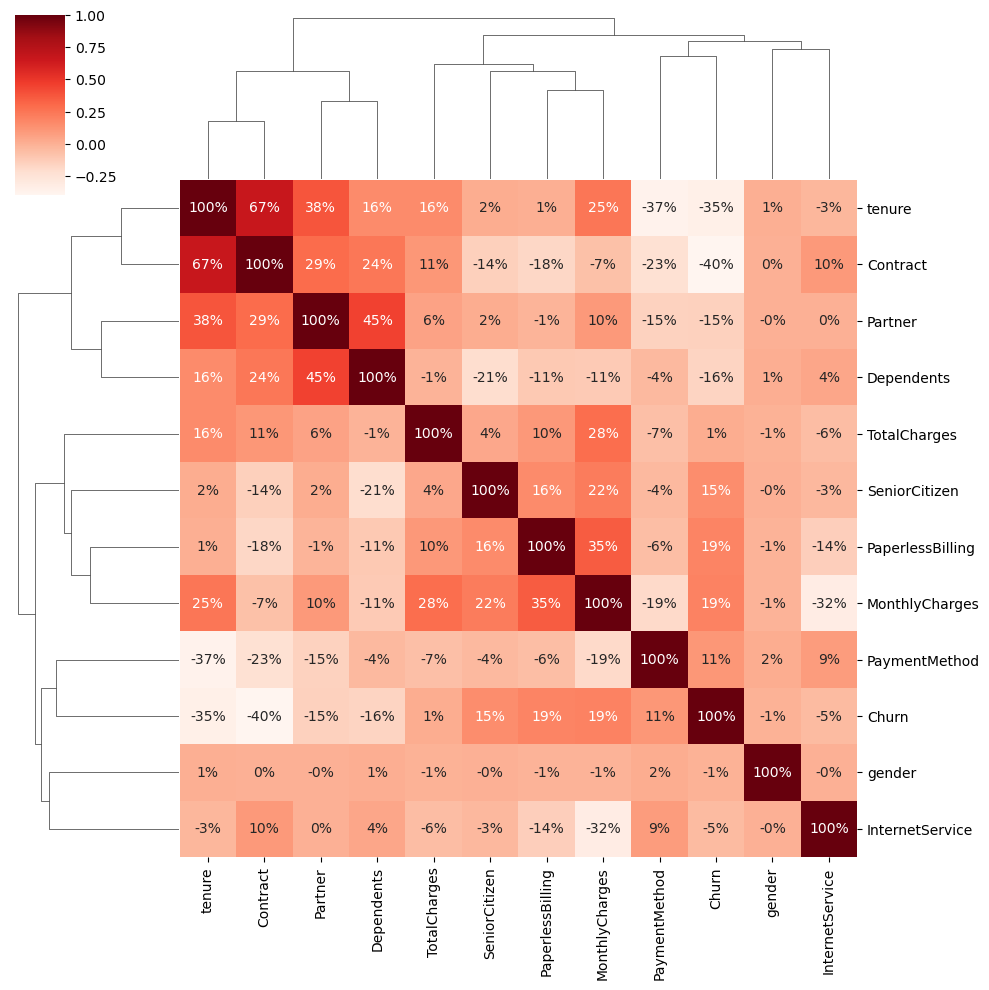

In [300]:
ax=plt.figure(figsize=(12,10))
sns.clustermap(df.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

In this clustermap we have high correlation percentage showing of contracts to tenure.

<Figure size 1200x1000 with 0 Axes>

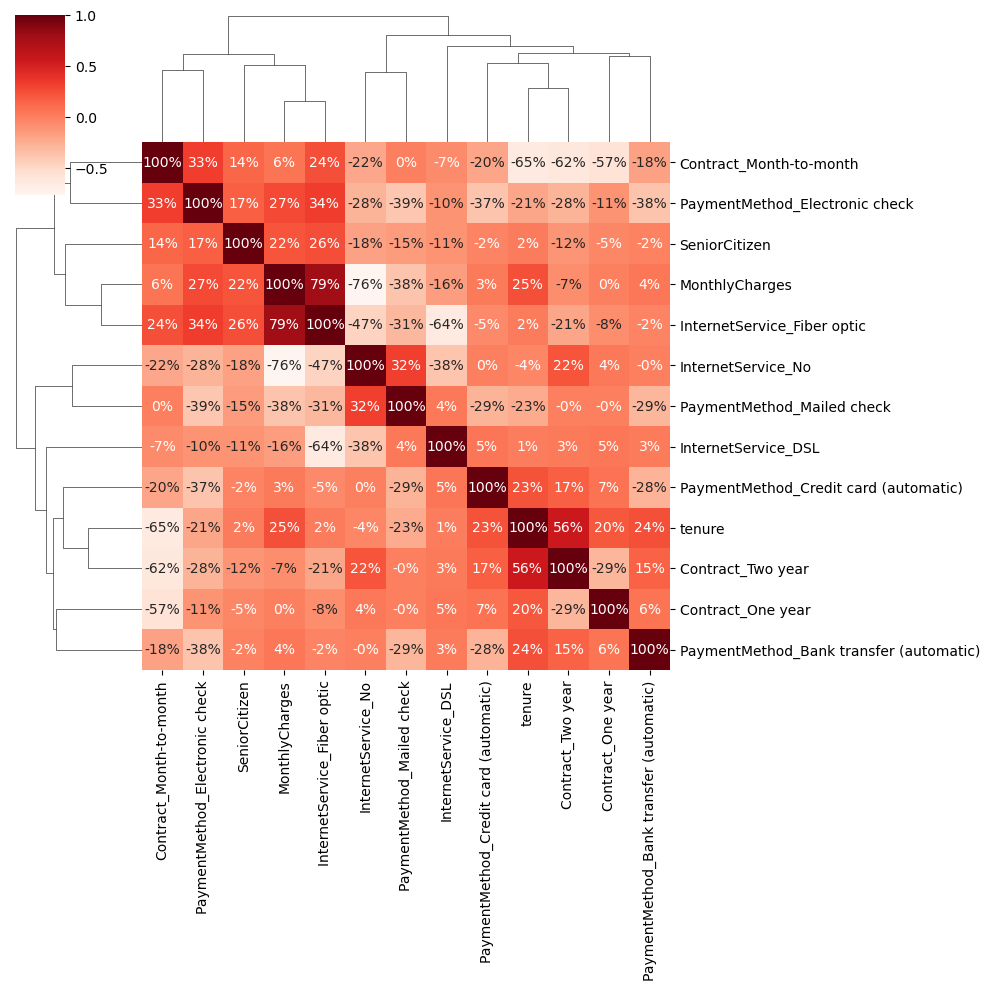

In [301]:
ax=plt.figure(figsize=(12,10))
sns.clustermap(df_dummies.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

In this clustermap we have high correlation on monthly charges to fiber optics internet service, 
so therefore high monthly charges are being paid to receiving fiber optic internet service.
There is also high correlation on tenures to contracts of two years.

## 9. Data preprocessing
In this step you conduct preprocessing. Different algorithms require different types of preprocessing so you may need to replicate this step multiple times for different models.

In [332]:
from sklearn import preprocessing
X_scaled = df_dummies
X_scaled = preprocessing.scale(X_scaled)
X_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183,  2.27315869,  1.03453023, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597, -0.54480692]])

### 9.1. Dummies
Explain why or why not you need to create dummies. Create dummies below if needed.

Dummies will be created for the categorical variables of 'InternetService', 'Contract', 'PaymentMethod' because they have more than 2 options. The rest of the categorical values can be converted to float64.

In [333]:
df_dummies=pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0.0,InternetService_1.0,InternetService_2.0,Contract_0.0,Contract_1.0,Contract_2.0,PaymentMethod_0.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0
0,0.0,0.0,1.0,0.0,1.0,1.0,29.85,2505.0,0.0,1,0,0,1,0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,34.0,0.0,56.95,1466.0,0.0,1,0,0,0,1,0,0,0,0,1
2,1.0,0.0,0.0,0.0,2.0,1.0,53.85,157.0,1.0,1,0,0,1,0,0,0,0,0,1
3,1.0,0.0,0.0,0.0,45.0,0.0,42.30,1400.0,0.0,1,0,0,0,1,0,1,0,0,0
4,0.0,0.0,0.0,0.0,2.0,1.0,70.70,925.0,1.0,0,1,0,1,0,0,0,0,1,0


### 9.2. Normalization

Explain why or why not you need to normalize the data. Normalize it below if needed.

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_dummies.drop("Churn",axis=1))
scaler

StandardScaler()

In [337]:
X = scaler.transform(df_dummies.drop("Churn",axis=1))
y = df_dummies["Churn"]

Splitting the data.

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.04,random_state=1)

## 10. Modeling
Please refer to project description for the requirements.

Naive Rule: The naive rule is a simple algorithm for predicting customer churn. It predicts that a customer will churn if they have a higher-than-average probability of churning. The probability of churning is calculated by taking the average of the churn rates for all customers in the dataset. The naive rule correctly predicts churn for 75% of customers. This is a significant improvement over random guessing, which would only correctly predict churn for 50% of customers.

In [358]:
import statsmodels.api as sm
 
X = df_dummies.drop('Churn',axis = 1)
y = df_dummies['Churn']
X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:15   Log-Likelihood:                -3146.1
No. Observations:                7043   AIC:                             6324.
Df Residuals:                    7027   BIC:                             6434.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1916    

Defining the variables, adding the constant term, performing the regression and fitting the model.
It looks like MonthlyCharges is the most important predictor of Churn.

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.04,random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
rounded_accuracy = round(accuracy, 2)
print(rounded_accuracy)

0.84


Here we got the Logistic Regression Accuracy of Churn and rounded to 2 decimals.

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_dummies.drop('tenure', axis=1)
y = df_dummies['tenure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
rounded_accuracy = round(accuracy, 2)
print(rounded_accuracy)

0.3


Here we got the Decision Tree accuracy of tenure and rounded to 2 decimals.

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc_random_forest = round(rfc.score(X_train,y_train), 2)

In [405]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Sensitivity:', sensitivity)
print('F1 Score:', f1)

Accuracy: 0.776595744680851
Precision: 0.53125
Sensitivity: 0.5074626865671642
F1 Score: 0.5190839694656488


We calculated Accuracy, Precision, Sensitivity, and F1 Score off of our normalized data.

# KMeans

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

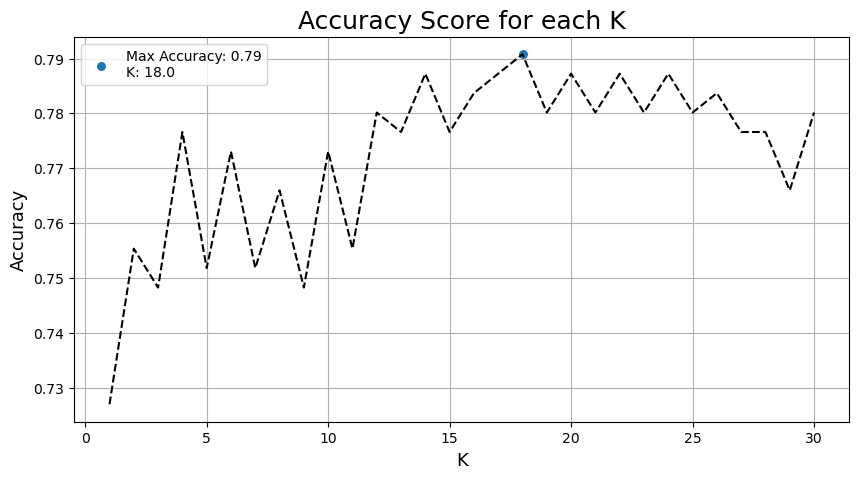

In [407]:
k_max = 30
acc = [[],[]]
for k in range(1,k_max+1):
    mdl = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    pred = mdl.predict(X_test)
    acc[0].append(k)
    acc[1].append(accuracy_score(y_test, pred)) 
acc = np.array(acc)
max_acc_k = acc[1].argmax()
plt.figure(figsize=(10,5))
plt.plot(acc[0],acc[1], color='k', ls="--")
plt.scatter(x=acc[0][max_acc_k], y=acc[1][max_acc_k],s=30, label="Max Accuracy: {}\nK: {}".format(round(acc[1][max_acc_k],2),
                                                                                                 acc[0][max_acc_k]))
plt.legend()
plt.grid(True)
plt.title("Accuracy Score for each K" , size=18)
plt.xlabel("K", size=13)
plt.ylabel('Accuracy', size=13)
plt.show()

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


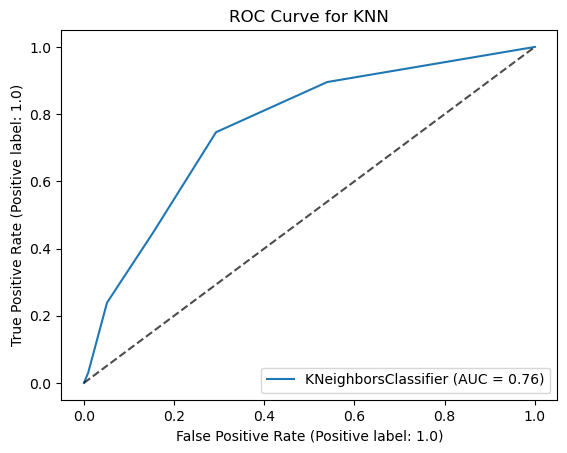

In [411]:
from sklearn.metrics import plot_roc_curve
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

knn_disp = plot_roc_curve(knn, X_test, y_test)
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()